# Introduction to NLP with Spacy

In [1]:
import spacy
from spacy import displacy
print(spacy.__version__)

2.0.11


In [22]:
nlp = spacy.load('en')

## Spacy attempts to parse every word and identify many attributes including the following:

- Text: The original word text.
- Lemma: The base form of the word. 
- POS: The simple part-of-speech tag. 
- Tag: The detailed part-of-speech tag. 
- Dep: Syntactic dependency, i.e. the relation between tokens.
- Shape: The word shape – capitalisation, punctuation, digits. 
- is alpha: Is the token an alpha character? 
- is stop: Is the token part of a stop list, i.e. the most common words of the language? 

In [23]:
doc = nlp(u'CNN reporter Sandy Hume said Hurricane Sandy will cost over $1 billion in damages.')

for token in doc[:10]:
    print('text :', token.text, 
          '\nlemma : ', token.lemma_, 
          '\nPOS : ', token.pos_, 
          '\nTag : ',token.tag_, 
          '\nDep: ', token.dep_,
          '\nShape: ', token.shape_, 
          '\nis_alpha? ', token.is_alpha, 
          '\nIs stop? ', token.is_stop,
          '\nPosition :', token.i,
          '\n____________________________')

text : CNN 
lemma :  cnn 
POS :  PROPN 
Tag :  NNP 
Dep:  compound 
Shape:  XXX 
is_alpha?  True 
Is stop?  False 
Position : 0 
____________________________
text : reporter 
lemma :  reporter 
POS :  NOUN 
Tag :  NN 
Dep:  compound 
Shape:  xxxx 
is_alpha?  True 
Is stop?  False 
Position : 1 
____________________________
text : Sandy 
lemma :  sandy 
POS :  PROPN 
Tag :  NNP 
Dep:  compound 
Shape:  Xxxxx 
is_alpha?  True 
Is stop?  False 
Position : 2 
____________________________
text : Hume 
lemma :  hume 
POS :  PROPN 
Tag :  NNP 
Dep:  nsubj 
Shape:  Xxxx 
is_alpha?  True 
Is stop?  False 
Position : 3 
____________________________
text : said 
lemma :  say 
POS :  VERB 
Tag :  VBD 
Dep:  ROOT 
Shape:  xxxx 
is_alpha?  True 
Is stop?  False 
Position : 4 
____________________________
text : Hurricane 
lemma :  hurricane 
POS :  PROPN 
Tag :  NNP 
Dep:  compound 
Shape:  Xxxxx 
is_alpha?  True 
Is stop?  False 
Position : 5 
____________________________
text : Sandy 
lemma :  san

## Beyond Individual Words

Spacy allows you to extract a number of different document components that may be useful:
    - Noun Chunks
    - Entities and Entity Type

In [24]:
for chunk in doc.noun_chunks: #identifies noun chunks in the text
    print(chunk)

CNN reporter Sandy Hume
Hurricane Sandy
damages


In [25]:
for ent in doc.ents: #identifies entities in the text
    print(ent, ent.label_)

CNN ORG
Sandy Hume PERSON
Hurricane Sandy PERSON
over $1 billion MONEY


In [26]:
#test = 'Janet Yellen was yellen and hootin and holleran about rate hikes'
#doc = nlp(test)
#for ent in doc.ents:
#    print(ent, ent.label_)

## We can visualize this

In [27]:
displacy.render(doc, style='ent', jupyter = True)

## Excercise:

Go find a news article and drop it in here: https://explosion.ai/demos/displacy-ent.  Check to see how well the algorithm does

## We can extract individual sentences

 - The sentence is often the most useful level of analysis

In [28]:
doc_extended = nlp('''CNN reporter Sandy Hume said Hurricane Sandy cost over $1 billion in damages. 
                   Other estimates are even higher.''')
for sent in doc_extended.sents:
    print(sent)

CNN reporter Sandy Hume said Hurricane Sandy cost over $1 billion in damages. 
                   
Other estimates are even higher.


## We can also visualize the dependency tree

In [29]:
displacy.render(doc, style='dep', jupyter = True)

#the word where the arrow lands is the modifier, meaning it modifies the word where the arrow starts. e.g. Sandy modifies Hume

## Why are all these features useful?  Lets explore with Pride and Prejudice

Using an example of Pride and Prejudice adapted from: 
 - https://github.com/explosion/spacy-notebooks/blob/master/notebooks/conference_notebooks/advanced_text_analysis.ipynb 

In [31]:
with open('assets/dataset/pride.txt', encoding = 'latin-1') as f:
    pride = f.read()
pride = nlp(pride, disable = ['parser']) ## Disabling the parser for memory

In [32]:
import pandas as pd
import numpy as np

x = list(range(100))
y = list(range(50))

to_histogram = x+y
print(sorted(to_histogram))

np.histogram(to_histogram)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


(array([20, 20, 20, 20, 20, 10, 10, 10, 10, 10]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]))

In [33]:
#?np.histogram

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

def locations(needle, haystack): 
    """ 
    Make a list of locations, bin those into a histogram, 
    and finally put it into a Pandas Series object so that we
    can later make it into a DataFrame. 
    """
    return pd.Series(np.histogram(
        [word.i for word in haystack 
         if word.text.lower() == needle], bins=50)[0])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113941128>,
      dtype=object)

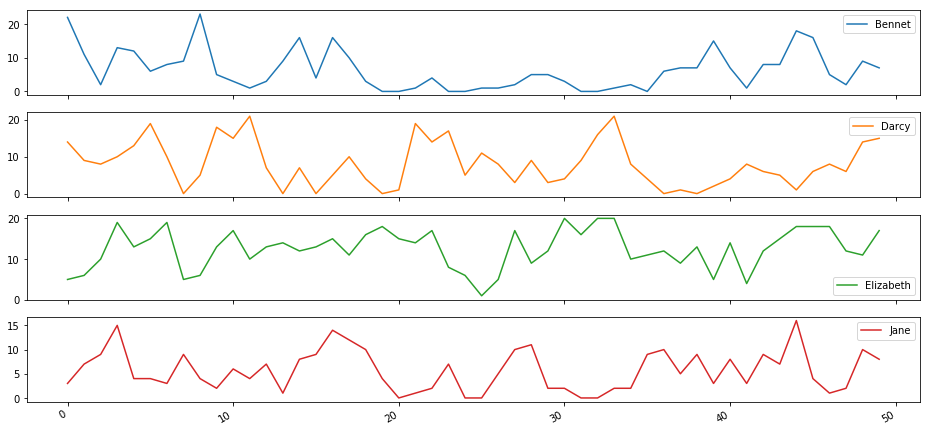

In [35]:
# A bit of notebook plot formatting. 
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8


## Fancy pandas call to create a dataframe with the counts of the mentions of each character
pd.DataFrame(
    {name: locations(name.lower(), pride) 
     for name in ['Elizabeth', 'Darcy', 'Jane', 'Bennet']}
).plot(subplots=True)

## I didn't run the below cell for memory purposes

But lets look at where I got it from: 

https://github.com/explosion/spacy-notebooks/blob/master/notebooks/conference_notebooks/advanced_text_analysis.ipynb 



In [36]:
from collections import Counter
from collections import defaultdict

pride =  nlp(pride.text, disable=['ner'])

# Lets look at the adjectives describing each character, this time enabling the parser
def adjectivesDescribingCharacters(text, character):
    sents = [sent for sent in text.sents if character in sent.string]
    adjectives = []
    for sent in sents: 
        for word in sent: 
            if character in word.string:
                for child in word.children: 
                    if child.pos_ == 'ADJ': 
                        adjectives.append(child.string.strip())
    return Counter(adjectives).most_common(10)

In [37]:
adjectivesDescribingCharacters(pride, 'Darcy')

[('late', 7),
 ('superior', 1),
 ('Oh!ÊthatÊabominable', 1),
 ('poor', 1),
 ('her', 1)]